# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [11]:
df = pd.read_csv('b1abb33c4f.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

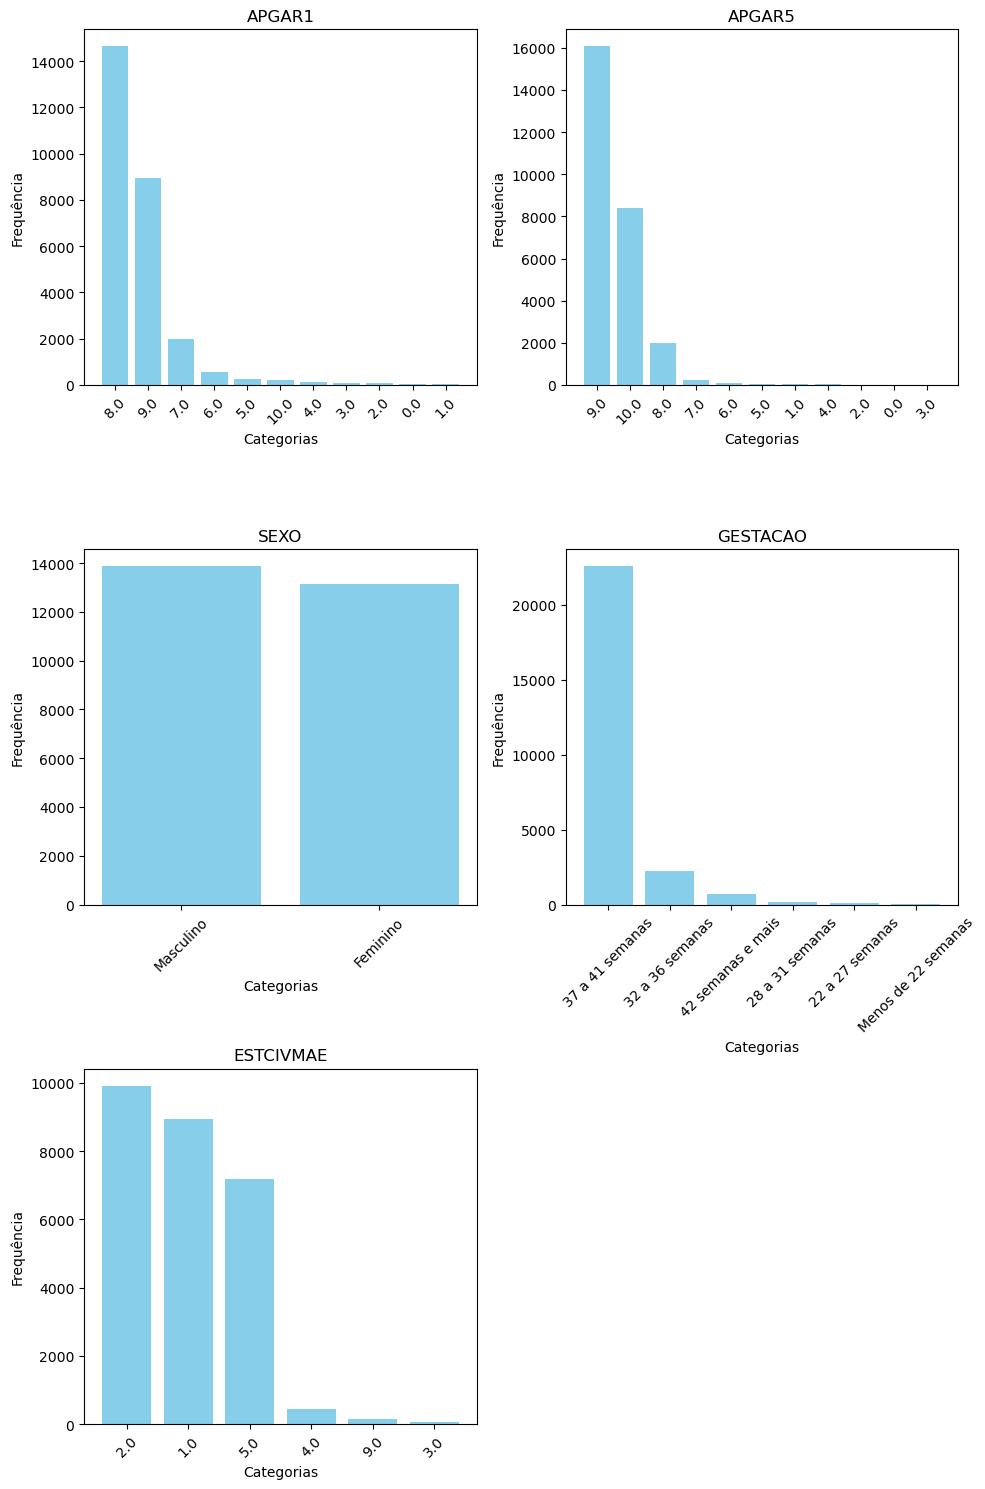

In [14]:
# Lista de variáveis para os gráficos
variaveis = ['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']

# Configuração para dois gráficos por linha
n_cols = 2
n_rows = len(variaveis) // n_cols + (len(variaveis) % n_cols > 0)

# Criando uma figura e um conjunto de subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))

# Achatando o array de eixos para facilitar o acesso em um loop
axs = axs.ravel()

for i, var in enumerate(variaveis):
    # Contagem de valores para a variável atual
    contagem = df[var].value_counts()
    
    # Criando o gráfico de barras para cada variável
    axs[i].bar(contagem.index.astype(str), contagem.values, color='skyblue')
    axs[i].set_title(var)
    axs[i].set_xlabel('Categorias')
    axs[i].set_ylabel('Frequência')
    axs[i].tick_params(axis='x', rotation=45)

# Desligando os eixos extras que não são usados (caso haja um número ímpar de variáveis)
for ax in axs[i+1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [17]:
#Calculando o APGAR5 Médio por Número de Consultas:

apgar5_medio_por_consultas = df.groupby('CONSULTAS')['APGAR5'].mean().reset_index()
apgar5_medio_por_consultas

,CONSULTAS,APGAR5
0,1,8.981481
1,2,9.057395
2,3,9.154440
3,4,9.207188
4,9,8.860000


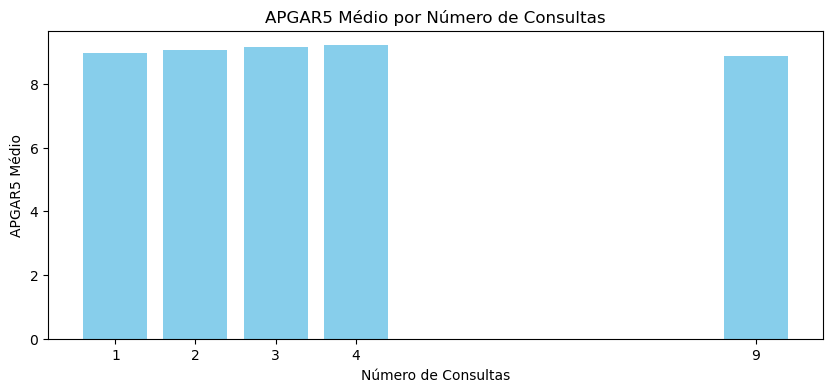

In [22]:
#Gerando gráfico com Matplotlib

plt.figure(figsize=(10, 4))
plt.bar(apgar5_medio_por_consultas['CONSULTAS'], apgar5_medio_por_consultas['APGAR5'], color='skyblue')
plt.title('APGAR5 Médio por Número de Consultas')
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')
plt.xticks(apgar5_medio_por_consultas['CONSULTAS'].unique())
plt.show()

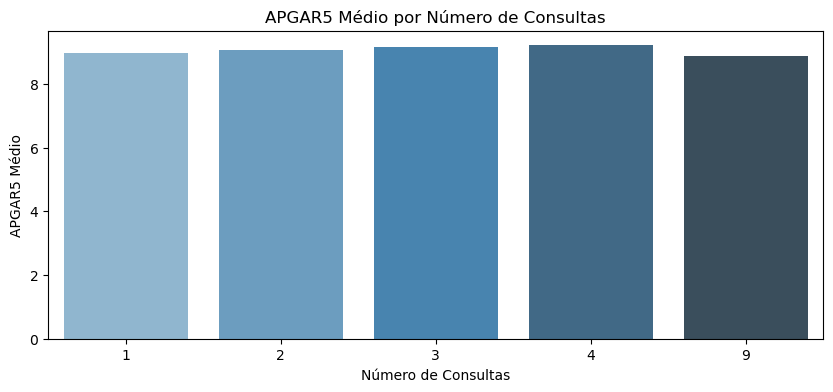

In [24]:
#Gerando gráfico com Seaborn

plt.figure(figsize=(10, 4))
sns.barplot(x='CONSULTAS', y='APGAR5', data=apgar5_medio_por_consultas, palette='Blues_d')
plt.title('APGAR5 Médio por Número de Consultas')
plt.xlabel('Número de Consultas')
plt.ylabel('APGAR5 Médio')
plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

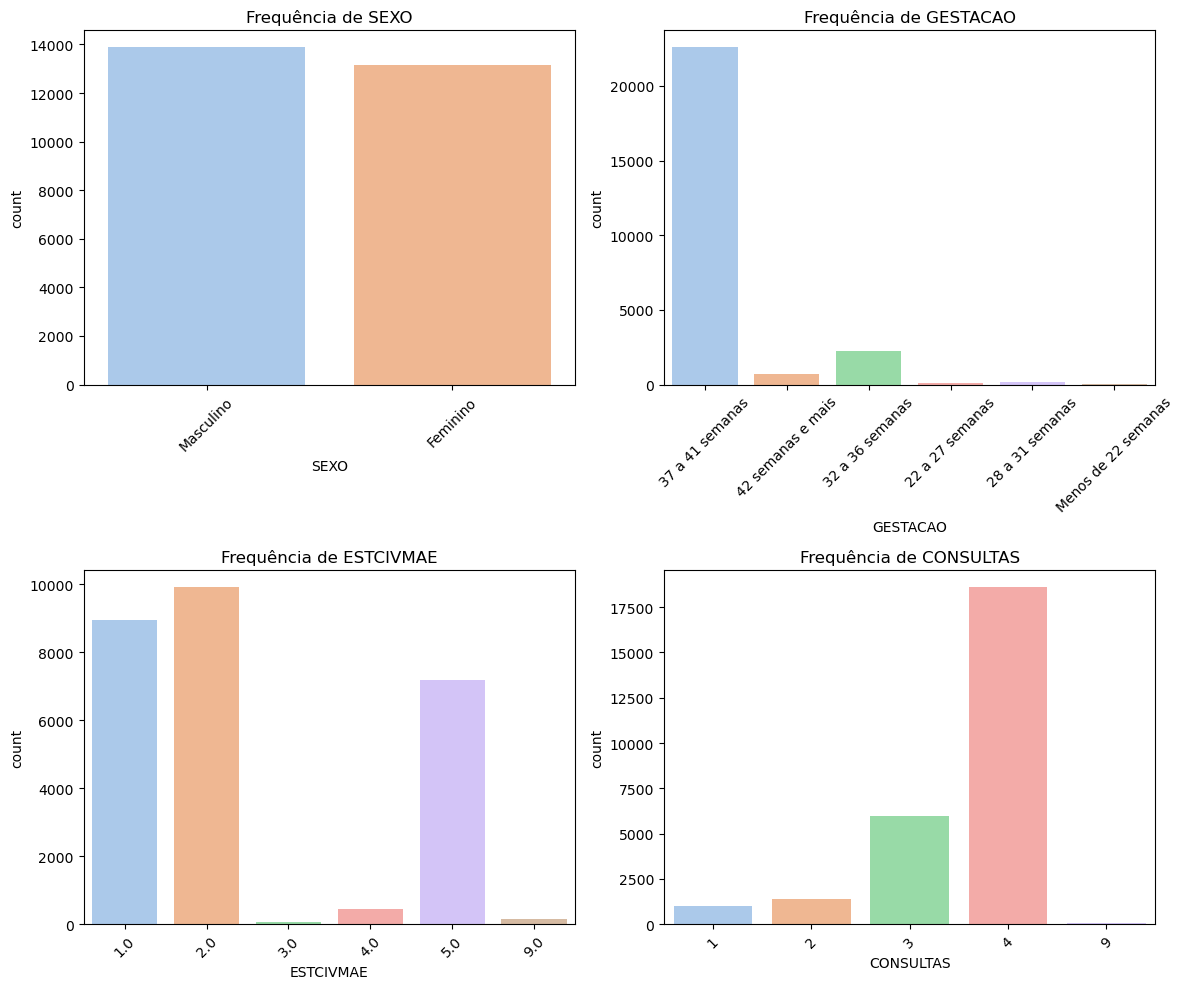

In [26]:
variaveis_2 = ['SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']

plt.figure(figsize=(12, 10))

for i, var in enumerate(variaveis_2, start=1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, data=df, palette='pastel')
    plt.title(f'Frequência de {var}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()